<a href="https://colab.research.google.com/github/hvr2026/Clustering-Algorithms/blob/main/Clustering%20of%20Documents/Clustering_of_Documents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required libraries
!pip install -U sentence-transformers scikit-learn matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 54.0 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.0
    Uninstalling matplotlib-3.8.0:
      Successfully uninstalled matplotlib-3.8.0
  Attempting uninstall: sentence-transformers
    Found existing installation: sentence-transformers 3.2.1
    Uninstalling sentence-transformers-3.2.1:
      Successfully uninstalled sentence-transformers-3.2.1


In [3]:
# Import necessary libraries
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:

# Step 1: Load an extended dataset of documents
documents = [
    "The quick brown fox jumps over the lazy dog.",
    "Machine learning is fascinating.",
    "Deep learning models require a lot of data.",
    "Artificial Intelligence is transforming the world.",
    "I love hiking in the mountains during summer.",
    "The book was a thrilling mystery.",
    "Natural Language Processing enables machines to understand text.",
    "The weather today is sunny and pleasant.",
    "Understanding neural networks can be challenging.",
    "Clustering documents is a common NLP task.",
    "Self-driving cars use advanced AI algorithms.",
    "The beach is a wonderful place to relax during vacations.",
    "Reading books enhances vocabulary and knowledge.",
    "Big data analytics helps organizations make informed decisions.",
    "Space exploration inspires humanity to dream big.",
    "The recipe requires eggs, flour, sugar, and milk.",
    "Photography captures moments that last forever.",
    "Python is a versatile programming language.",
    "Gardening is a therapeutic and productive hobby.",
    "The skyscrapers of the city gleamed under the sunlight.",
    "Online shopping has revolutionized the retail industry.",
    "Quantum computing is the next frontier in technology.",
    "Trekking in the Himalayas is an adventurous experience.",
    "Meditation helps in reducing stress and increasing focus.",
    "Cloud computing allows access to data from anywhere.",
    "The museum exhibits ancient artifacts and paintings.",
    "Writing essays helps in developing critical thinking skills.",
    "The advent of 5G will accelerate IoT adoption.",
    "Rivers are the lifelines of civilizations.",
    "The concert last night was electrifying.",
    "Virtual reality is redefining entertainment.",
    "Renewable energy sources are essential for a sustainable future.",
    "Wildlife photography requires patience and skill.",
    "Social media connects people but also has downsides.",
    "Learning a new language opens up cultural horizons.",
    "The startup ecosystem is thriving in Silicon Valley.",
    "Cybersecurity is crucial to protect online data.",
    "The art gallery features modern and contemporary works.",
    "Volunteering in community service is rewarding.",
    "Blockchain technology is more than just cryptocurrency.",
    "The park is filled with blooming flowers in spring.",
    "Cooking experiments often lead to delicious surprises.",
    "Augmented reality enhances user experiences in retail.",
    "Birdwatching is a calming activity for nature enthusiasts.",
    "Climate change is an urgent global issue.",
    "The library is a treasure trove of knowledge.",
    "Electric vehicles are gaining popularity worldwide.",
    "The novel's plot twist was completely unexpected.",
    "Data visualization tools simplify complex datasets.",
    "Robotics is automating tasks across industries.",
    "Traveling broadens perspectives and understanding.",
    "Historical documentaries teach us about the past.",
    "Smartphones have become an integral part of daily life.",
    "Sculpting is an art form requiring precision and creativity.",
    "Urban planning shapes the cities of tomorrow.",
    "Astronomy reveals the mysteries of the universe.",
    "Yoga promotes physical and mental well-being.",
    "Fiction novels allow readers to escape into imaginary worlds.",
    "Digital marketing is essential for modern businesses.",
    "The lake reflects the surrounding mountains beautifully.",
    "Artificial Intelligence is driving innovation across industries.",
    "Exploring caves is an exciting adventure.",
    "Cooking shows inspire viewers to try new recipes.",
    "The role of mentors is crucial in career development.",
    "Public speaking improves confidence and communication skills.",
    "Renewable energy will power the cities of the future.",
    "The violin produces a soulful and melodious sound.",
    "AI ethics is an important area of research.",
    "Skiing in the Alps is a thrilling winter activity.",
    "The evolution of technology is accelerating rapidly.",
    "Autonomous drones are used in delivery systems.",
    "The cultural diversity of festivals unites communities.",
    "Space missions require meticulous planning and execution.",
    "Innovation drives the growth of tech startups.",
    "E-learning platforms democratize access to education.",
    "Mountaineering demands physical and mental resilience.",
    "The movie's special effects were groundbreaking.",
    "Music therapy helps individuals with emotional challenges.",
    "The bridge was an engineering marvel of its time.",
    "Astronauts undergo rigorous training before space missions.",
    "AI-driven chatbots are improving customer service experiences.",
    "Fishing in the serene lake was relaxing.",
    "Sports events bring people together in celebration.",
    "The bakery's pastries were a delightful treat.",
    "Exploring historical landmarks deepens cultural appreciation.",
    "Fitness trackers motivate individuals to stay active.",
    "Storytelling is a powerful way to convey ideas.",
    "Marine biology uncovers the mysteries of the ocean.",
    "The artist's paintings conveyed deep emotions.",
    "Design thinking fosters creative problem-solving.",
    "The festival showcased traditional dances and music.",
    "Coding competitions challenge participants' skills.",
    "Eco-tourism promotes sustainability and conservation.",
    "Space telescopes capture breathtaking images of galaxies.",
    "The forest is home to diverse flora and fauna.",
    "Chess is a game of strategy and foresight.",
    "Green building practices are reducing energy consumption.",
    "The marathon tested participants' endurance.",
    "Solar panels harness the sun's energy efficiently.",
    "Machine translation bridges language barriers.",
    "The monument stood as a symbol of resilience.",
    "Sailing across the open sea felt liberating.",
    "Big data is reshaping healthcare diagnostics.",
    "The poet's verses were poignant and evocative.",
    "Flying drones for photography offers unique perspectives.",
    "Urban gardening contributes to food security.",
    "The autonomous car navigated city streets seamlessly.",
    "Artificial Intelligence assists in medical diagnoses.",
    "Virtual museums provide access to global art collections.",
    "The ancient ruins were a window into the past.",
    "Eco-friendly packaging reduces environmental impact.",
    "The orchestra's performance received a standing ovation.",
    "Digital twins model real-world systems virtually.",
    "The hike to the summit was physically demanding.",
    "AI-powered personal assistants are improving productivity.",
    "The novel explored themes of love and loss.",
    "Innovations in agriculture are addressing food shortages.",
    "The symphony blended classical and modern elements.",
    "Science fiction movies spark curiosity about the future.",
    "The beach cleanup drive attracted many volunteers.",
    "Robots are revolutionizing manufacturing industries.",
    "The professor's lecture was engaging and insightful.",
    "AI models require careful training to avoid biases.",
    "The mountain trail offered breathtaking views.",
    "The town's heritage site is a popular tourist attraction.",
    "Machine learning improves image recognition accuracy.",
    "Classical music has a timeless appeal.",
    "The wildlife sanctuary protects endangered species.",
    "The entrepreneur's journey was inspiring to many.",
    "AI tools are transforming creative industries.",
    "The scenic countryside was perfect for a weekend getaway.",
    "Ballet combines art, music, and athleticism.",
    "The innovation hub nurtures emerging startups.",
    "Astronomical events captivate stargazers around the world.",
    "The cultural festival highlighted local traditions.",
    "Advanced robotics is entering healthcare for surgeries.",
    "Gardening classes teach sustainable practices.",
    "Art installations add vibrancy to urban landscapes.",
    "The ecosystem of coral reefs is incredibly delicate.",
    "Augmented reality makes learning interactive.",
    "Tech conferences bring together innovators and investors.",
    "Creative writing workshops hone literary skills.",
    "The rainforest is a vital part of Earth's ecosystem.",
    "The painting exhibited a stunning use of colors.",
    "Space travel inspires advancements in technology.",
    "The sound of waves crashing was soothing.",
    "Hiking trails offer an escape into nature.",
    "Blockchain ensures transparency in transactions.",
    "Artificial Intelligence is revolutionizing financial services.",
    "Cooking classes are a fun way to learn new recipes.",
    "The invention of the telescope changed astronomy forever.",
    "The athlete broke multiple records in the championship.",
    "Machine learning models detect anomalies in data.",
    "Documentaries shed light on critical social issues.",
    "The interactive exhibit engaged visitors of all ages.",
    "Virtual fitness classes make workouts accessible to everyone.",
    "Historical fiction novels blend imagination with facts.",
    "The biodiversity in rainforests is astounding.",
    "Online learning platforms offer flexibility for students.",
    "The team celebrated their victory in the tournament.",
    "The wind turbines generated clean energy efficiently.",
    "Digital art is gaining recognition in galleries worldwide.",
    "Space tourism might become a reality in the future.",
    "Machine learning algorithms classify emails effectively.",
    "The symphony orchestra's performance was mesmerizing.",
    "AI-driven recommendations personalize shopping experiences.",
    "The architecture of ancient temples is awe-inspiring.",
    "Virtual reality games offer immersive experiences.",
    "The conference focused on the ethical implications of AI.",
    "Ocean conservation is crucial for marine ecosystems.",
    "Reading science fiction stimulates creativity and imagination."
]


In [5]:

# Step 2: Generate embeddings using a state-of-the-art LLM model
model = SentenceTransformer('all-MiniLM-L6-v2')  # Lightweight and efficient
embeddings = model.encode(documents)


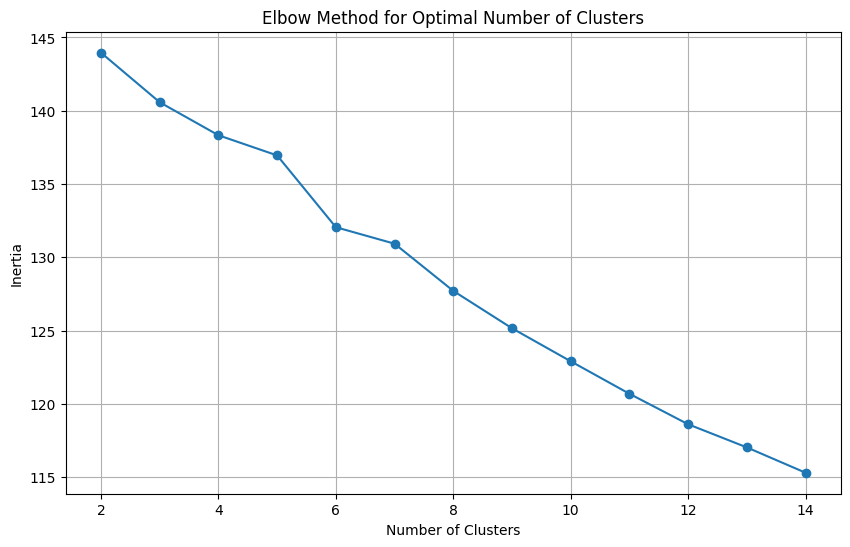

In [7]:

# Step 3: Determine the optimal number of clusters (Elbow Method)
inertia = []
cluster_range = range(2, 15)
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(embeddings)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


In [8]:
# Step 4: Perform clustering with optimal number of clusters
num_clusters = 5  # Adjust based on the elbow method result
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(embeddings)



In [9]:
# Step 5: Evaluate clustering with Silhouette Score
sil_score = silhouette_score(embeddings, clusters)
print(f"Silhouette Score for {num_clusters} clusters: {sil_score:.2f}")



Silhouette Score for 5 clusters: 0.02


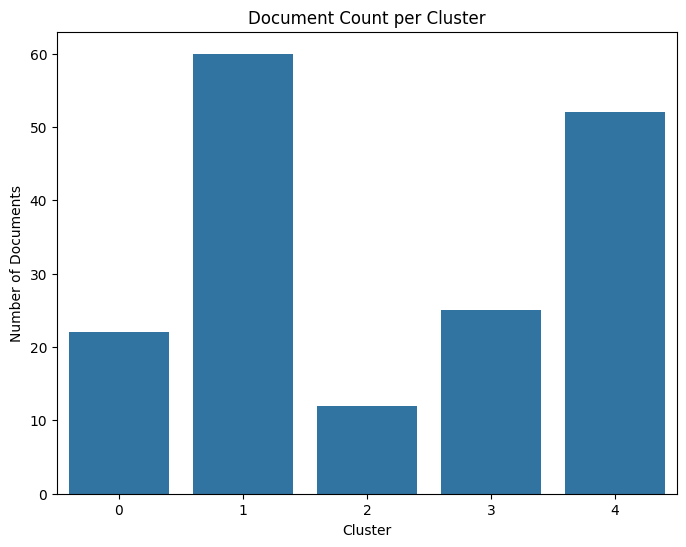

In [10]:
# Step 6: Visualize cluster distribution
cluster_counts = np.bincount(clusters)
plt.figure(figsize=(8, 6))
sns.barplot(x=np.arange(len(cluster_counts)), y=cluster_counts)
plt.title("Document Count per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Documents")
plt.show()


In [11]:
# Step 7: PCA for dimensionality reduction and visualization
pca = PCA(n_components=2)
reduced_embeddings_pca = pca.fit_transform(embeddings)



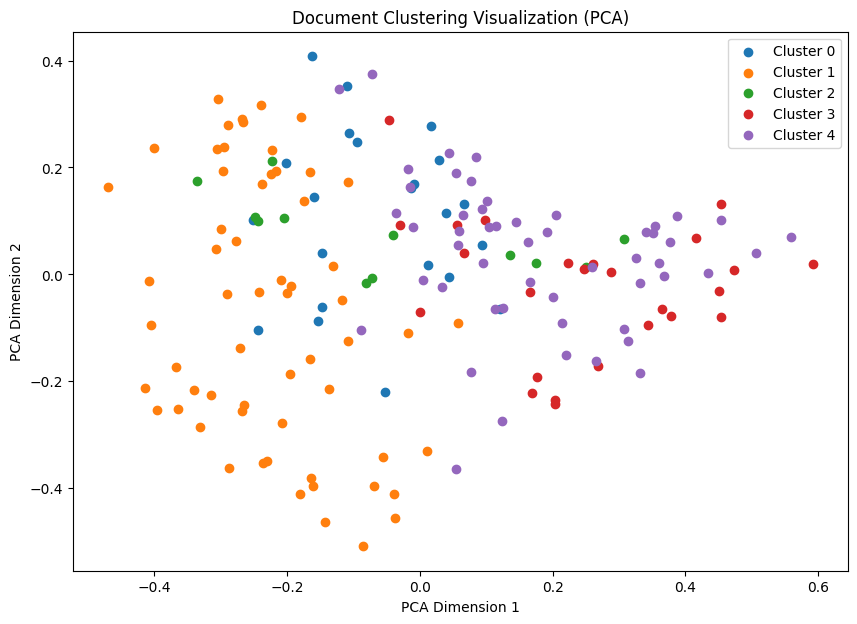

In [12]:
# Scatter plot of clusters (PCA)
plt.figure(figsize=(10, 7))
for i in range(num_clusters):
    cluster_points = reduced_embeddings_pca[clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')
plt.title("Document Clustering Visualization (PCA)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend()
plt.show()


In [13]:
# Step 8: t-SNE for dimensionality reduction and visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
reduced_embeddings_tsne = tsne.fit_transform(embeddings)



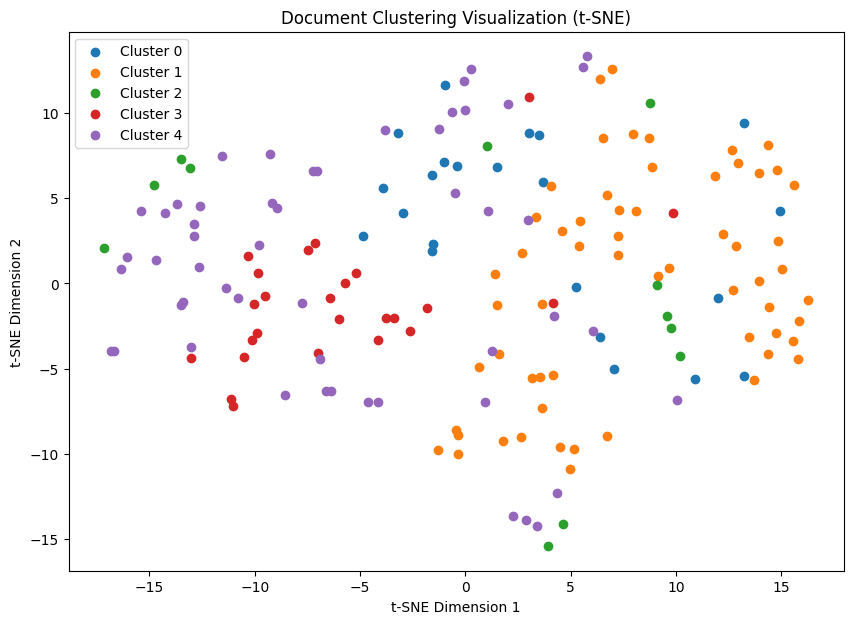

In [14]:
# Scatter plot of clusters (t-SNE)
plt.figure(figsize=(10, 7))
for i in range(num_clusters):
    cluster_points = reduced_embeddings_tsne[clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')
plt.title("Document Clustering Visualization (t-SNE)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend()
plt.show()



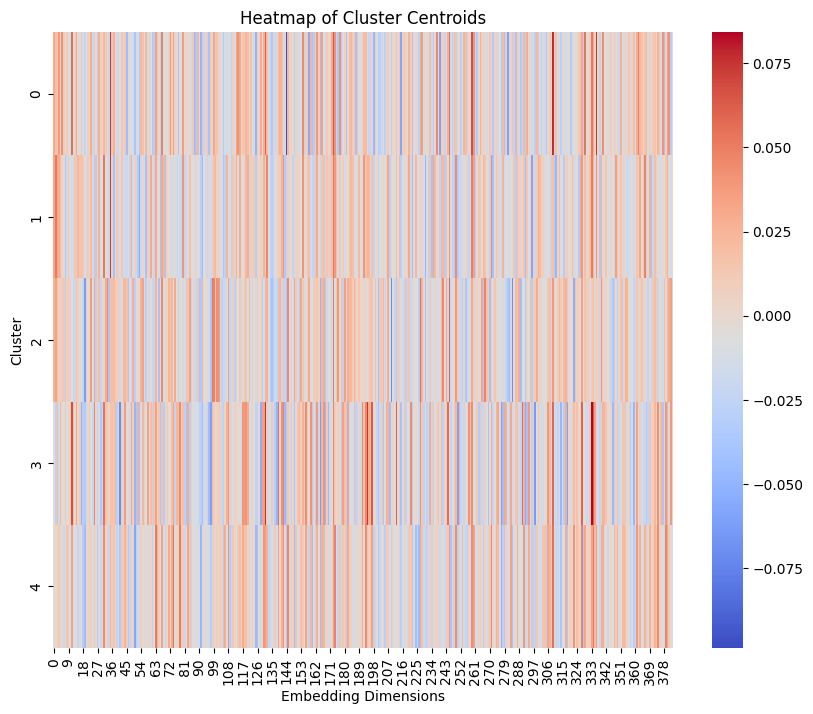

In [15]:
# Step 9: Heatmap of cluster centroids
centroids = kmeans.cluster_centers_
plt.figure(figsize=(10, 8))
sns.heatmap(centroids, cmap="coolwarm", annot=False)
plt.title("Heatmap of Cluster Centroids")
plt.xlabel("Embedding Dimensions")
plt.ylabel("Cluster")
plt.show()


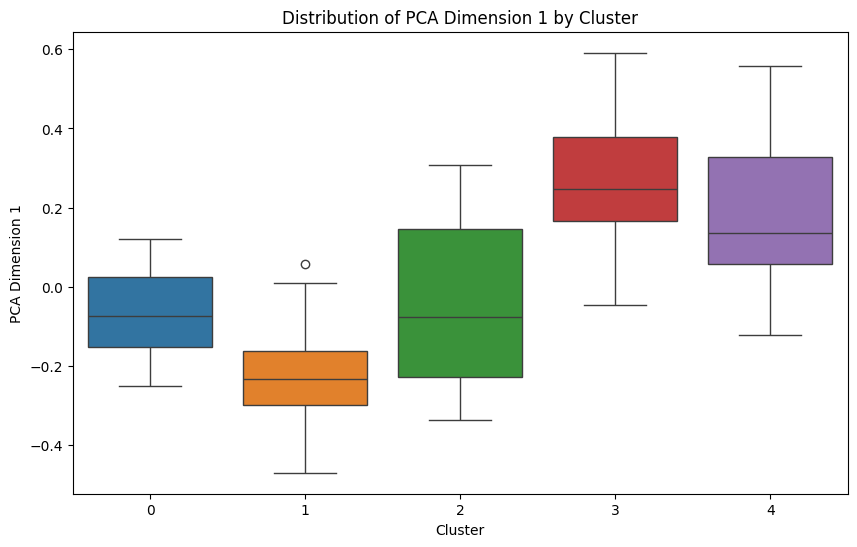

In [17]:
# Step 10: Visualize PCA components for each cluster
pca_components = pca.transform(embeddings)
plt.figure(figsize=(10, 6))
sns.boxplot(data=[pca_components[clusters == i, 0] for i in range(num_clusters)])
plt.title("Distribution of PCA Dimension 1 by Cluster")
plt.xlabel("Cluster")
plt.ylabel("PCA Dimension 1")
plt.show()



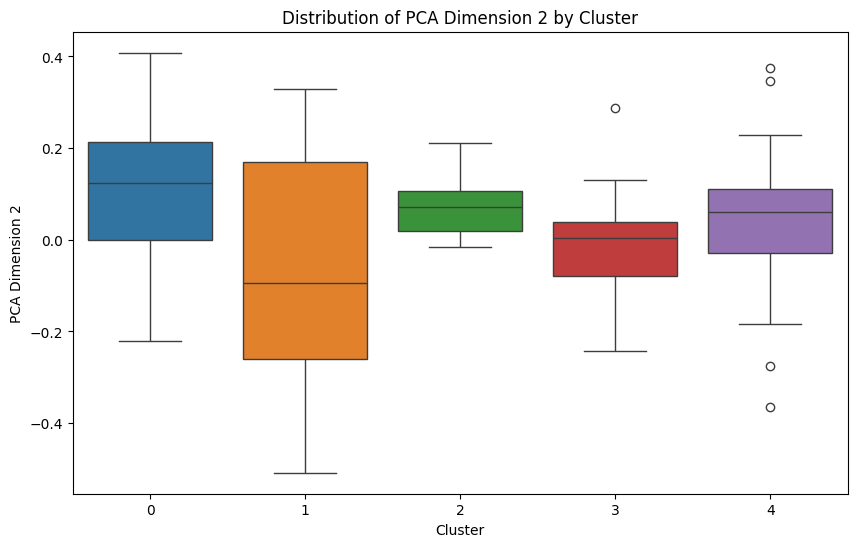

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=[pca_components[clusters == i, 1] for i in range(num_clusters)])
plt.title("Distribution of PCA Dimension 2 by Cluster")
plt.xlabel("Cluster")
plt.ylabel("PCA Dimension 2")
plt.show()


In [19]:
# Step 11: Display clustering results
clustered_docs = {i: [] for i in range(num_clusters)}
for doc, cluster in zip(documents, clusters):
    clustered_docs[cluster].append(doc)

for cluster_id, docs in clustered_docs.items():
    print(f"\nCluster {cluster_id}:")
    for doc in docs:
        print(f"  - {doc}")


Cluster 0:
  - Reading books enhances vocabulary and knowledge.
  - Meditation helps in reducing stress and increasing focus.
  - Writing essays helps in developing critical thinking skills.
  - Social media connects people but also has downsides.
  - Learning a new language opens up cultural horizons.
  - Volunteering in community service is rewarding.
  - Traveling broadens perspectives and understanding.
  - Historical documentaries teach us about the past.
  - Yoga promotes physical and mental well-being.
  - The role of mentors is crucial in career development.
  - Public speaking improves confidence and communication skills.
  - Mountaineering demands physical and mental resilience.
  - Music therapy helps individuals with emotional challenges.
  - Astronauts undergo rigorous training before space missions.
  - Storytelling is a powerful way to convey ideas.
  - The artist's paintings conveyed deep emotions.
  - The marathon tested participants' endurance.
  - The novel explored